<a href="https://colab.research.google.com/github/gerryfrank10/AI2025/blob/main/crocodile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zadafiyabhrami_global_crocodile_species_dataset_path = kagglehub.dataset_download('zadafiyabhrami/global-crocodile-species-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'global-crocodile-species-dataset' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv


In [ ]:
!ls -lah /kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv

-rw-r--r-- 1 1000 1000 222K Sep 10 10:18 /kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv


# Loading dataset

In [ ]:
import pandas as pd
import numpy as np
import os

path = os.path.join('/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv')
df = pd.read_csv(path)
df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [ ]:
# Checking Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [ ]:
# Get total number of sex
df['Sex'].value_counts()

,count
Sex,
Unknown,354
Male,325
Female,321


In [ ]:
# Get Unique Age Class
df['Age Class'].value_counts()

,count
Age Class,
Adult,510
Subadult,247
Juvenile,194
Hatchling,49


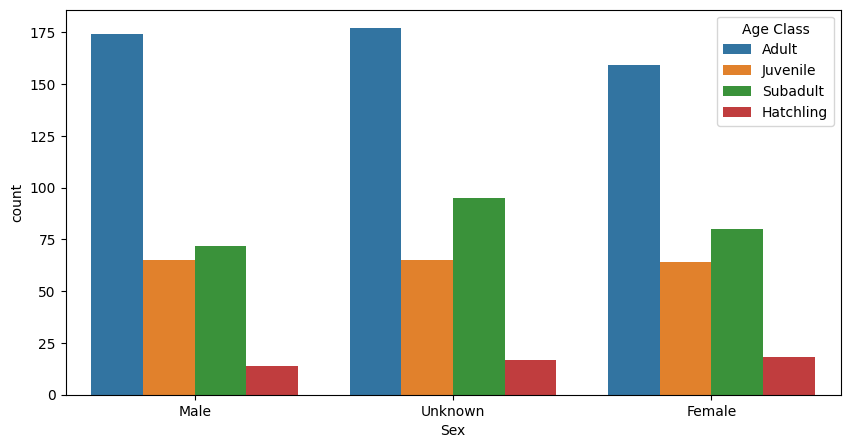

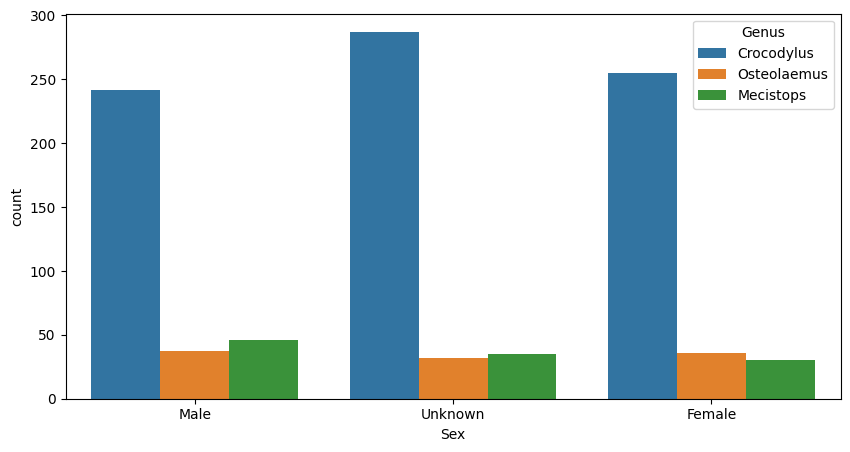

In [ ]:
# Plot Sex and Age class
import matplotlib.pyplot as plt
import seaborn as sns

categ_cols = ['Age Class', 'Genus']

for col in categ_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Sex',hue=col,data=df)
    plt.show()
# sns.countplot(x='Sex',hue='Age Class',data=df)
# plt.show()

In [ ]:
# Pivot table
df.pivot_table(index='Sex',
               columns='Age Class',
               aggfunc='size',
               fill_value=0)

Age Class,Adult,Hatchling,Juvenile,Subadult
Sex,,,,
Female,159,18,64,80
Male,174,14,65,72
Unknown,177,17,65,95


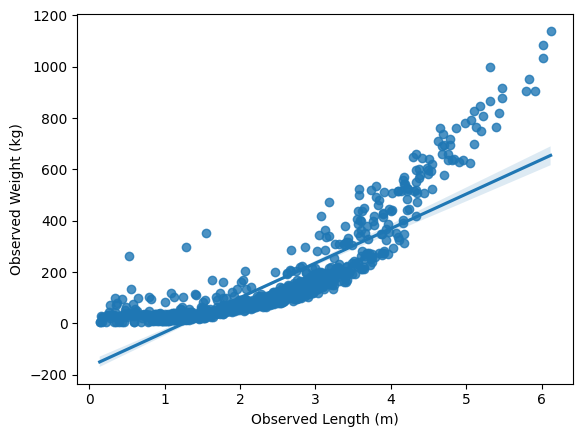

In [ ]:
# Numerical Plot for Obeserved Length and Observed Weight
# df.plot(kind='scatter',x='Observed Length (m)',y='Observed Weight (kg)', kde=True)
sns.regplot(x='Observed Length (m)',y='Observed Weight (kg)',data=df)
plt.show()

In [ ]:
df['Common Name'].value_counts()

,count
Common Name,
New Guinea Crocodile,68
Borneo Crocodile (disputed),67
American Crocodile,66
Morelet's Crocodile,64
Cuban Crocodile,59
Orinoco Crocodile,58
Philippine Crocodile,58
Saltwater Crocodile,58
West African Dwarf Crocodile,57


In [ ]:
# Top 10 Countries with crocodiles
top_10 = df['Country/Region'].value_counts()[:10].index
top_10_grouped = (
    df[df['Country/Region'].isin(top_10)]
    .groupby(['Country/Region', 'Sex'])
    .size()
    .unstack(fill_value=0)
)
top_10_grouped

Sex,Female,Male,Unknown
Country/Region,,,
Australia,22,17,15
Colombia,9,12,11
Congo (DRC),12,10,12
Cuba,26,22,29
Indonesia (Papua),12,7,13
Malaysia (Borneo),10,10,18
Mexico,8,13,14
Papua New Guinea,26,33,38
Philippines,25,21,22


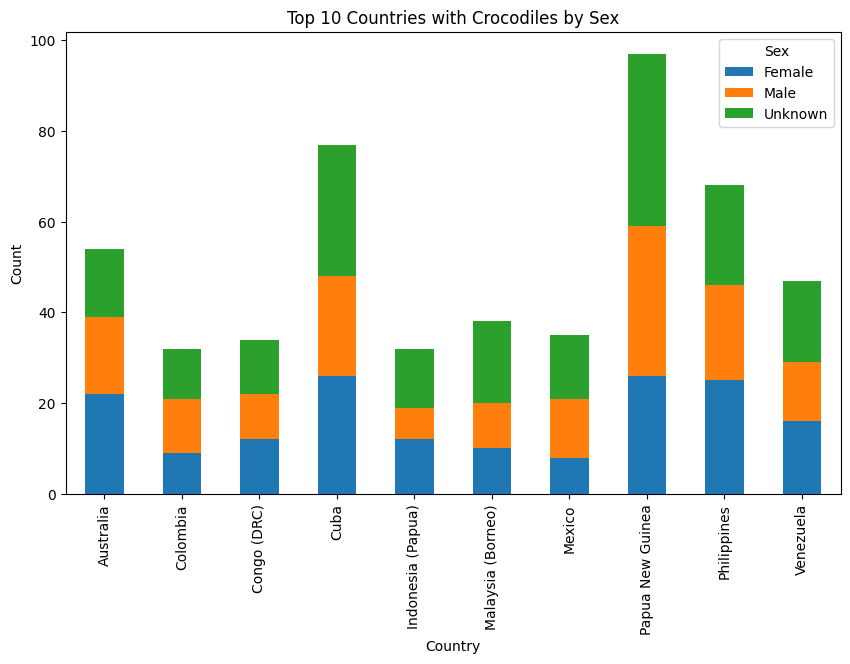

In [ ]:
top_10_grouped.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Top 10 Countries with Crocodiles by Sex")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

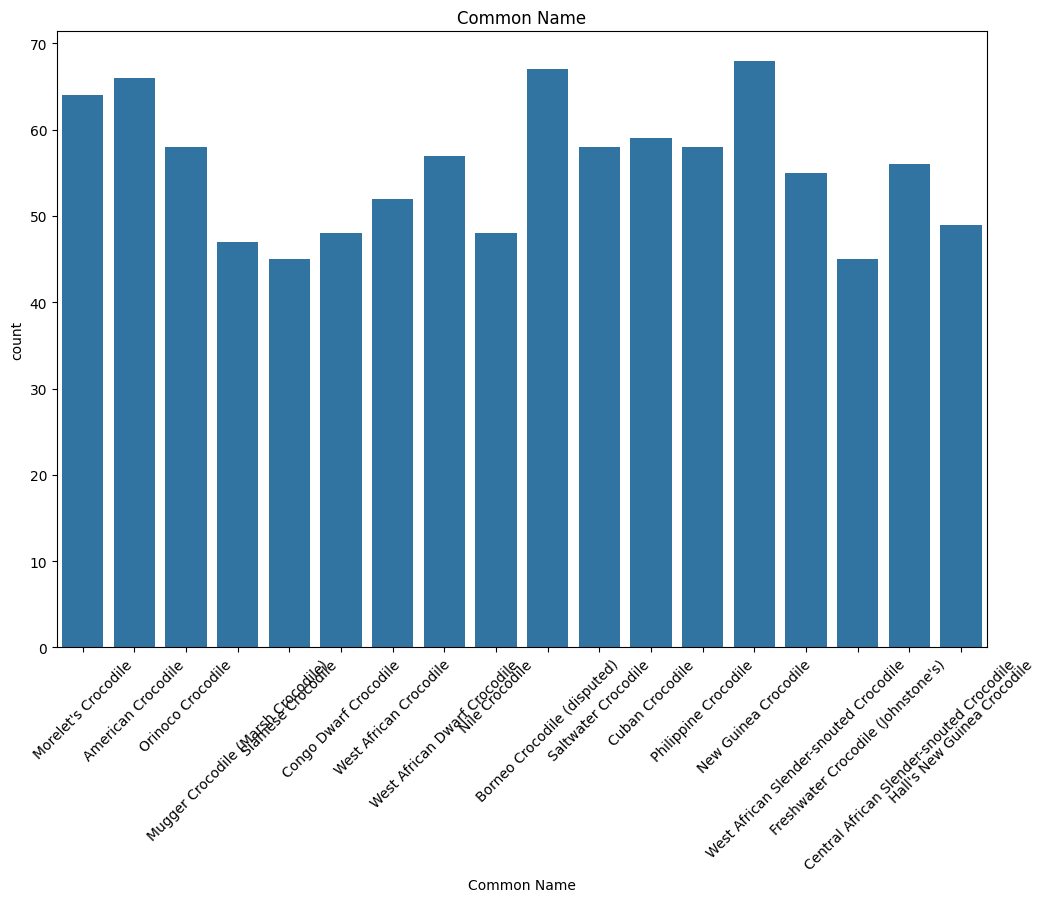

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Common Name')
sns.countplot(x='Common Name',data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Observer Name'].value_counts()

,count
Observer Name,
Christina Davis,2
Michael Miller,2
Sandra Becker,2
Ashley Hall,2
Matthew Miller,2
...,...
Tammy Cook,1
Connie Williams,1
Karen Gonzalez,1


In [ ]:
# Training the model